<a href="https://colab.research.google.com/github/Herbertkid/5G_Impact_On_Canada_GDP/blob/main/alGDPimpact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


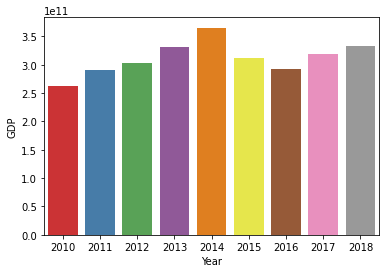

In [ ]:
dfCAGDP = pd.read_csv('/content/algdp.csv')
dfCAGDP['GDPgrowth'] = (dfCAGDP['GDP'] - dfCAGDP['GDP'].shift(1))
sns.barplot(x='Year', y='GDP', data=dfCAGDP, palette='Set1')

In [ ]:
dfCAGDP = dfCAGDP.dropna()
dfCAGDP

,Year,GDP,GDPgrowth
1,2011,2.899210e+11,2.833000e+10
2,2012,3.021320e+11,1.221100e+10
3,2013,3.314770e+11,2.934500e+10
4,2014,3.651910e+11,3.371400e+10
5,2015,3.119060e+11,-5.328500e+10
6,2016,2.925620e+11,-1.934400e+10
7,2017,3.192120e+11,2.665000e+10
8,2018,3.326590e+11,1.344700e+10


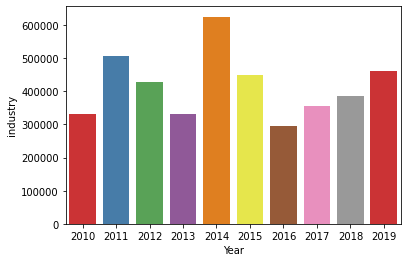

In [ ]:
dfex = pd.read_csv('/content/alexpenditure.csv')
dfex['industry'] = dfex['industry']/1000
sns.barplot(x='Year', y='industry', data=dfex, palette='Set1')

In [ ]:
def calculateEX(xk, industry):
  a = 4.464
  b = 0.000165
  land = 661848
  return (xk/pow(0.6214,2)*b+a)*pow(0.6214,2)*land+industry
def wrapper(row):
  return calculateEX(row['xk'],row['industry'])
def calculateEXxin(xk):
  a = 4.464
  b = 0.000165
  land = 661848
  return (xk/pow(0.6214,2)*b+a)*pow(0.6214,2)*land
def wrapperxin(row):
  return calculateEXxin(row['xk'])

In [ ]:
dfex['expenditure'] = dfex.apply(wrapper, axis=1)
dfex['expenditurexIN'] = dfex.apply(wrapperxin, axis=1)
dfex['exgrowth'] = (dfex['expenditure'] - dfex['expenditure'].shift(1)).dropna()
dfex = dfex.dropna()
dfex

,Year,xk,industry,expenditure,expenditurexIN,exgrowth
1,2011,5.92,505800.0,1.647287e+06,1.141487e+06,174509.828443
2,2012,6.05,427300.0,1.568801e+06,1.141501e+06,-78485.803360
3,2013,6.22,332200.0,1.473720e+06,1.141520e+06,-95081.435164
4,2014,6.38,625200.0,1.766737e+06,1.141537e+06,293017.472787
5,2015,6.47,449200.0,1.590747e+06,1.141547e+06,-175990.171557
6,2016,6.55,295000.0,1.436556e+06,1.141556e+06,-154191.263606
7,2017,6.63,354800.0,1.496365e+06,1.141565e+06,59808.736394
8,2018,6.72,386000.0,1.527574e+06,1.141574e+06,31209.828443
9,2019,6.83,462000.0,1.603586e+06,1.141586e+06,76012.012541


In [ ]:
dfCAGDP['exgrowth'] = dfex['exgrowth']
dfCAGDP['multiplier'] = abs(dfCAGDP['GDPgrowth']/ dfCAGDP['exgrowth']).dropna(axis=0)
dfCAGDP['Year'] = pd.to_datetime(dfCAGDP['Year'],format='%Y')
dfCAGDP.index = dfCAGDP['Year']
dfCAGDP['multiplier']['2017-01-01'] = dfCAGDP['multiplier']['2017-01-01']/2
dfCAGDP['multiplier']['2018-01-01'] = dfCAGDP['multiplier']['2018-01-01']/2
dfCAGDP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,GDP,GDPgrowth,exgrowth,multiplier
Year,,,,,
2011-01-01,2011-01-01,2.899210e+11,2.833000e+10,174509.828443,162340.426627
2012-01-01,2012-01-01,3.021320e+11,1.221100e+10,-78485.803360,155582.277013
2013-01-01,2013-01-01,3.314770e+11,2.934500e+10,-95081.435164,308630.175276
2014-01-01,2014-01-01,3.651910e+11,3.371400e+10,293017.472787,115057.985039
2015-01-01,2015-01-01,3.119060e+11,-5.328500e+10,-175990.171557,302772.589677
2016-01-01,2016-01-01,2.925620e+11,-1.934400e+10,-154191.263606,125454.578603
2017-01-01,2017-01-01,3.192120e+11,2.665000e+10,59808.736394,222793.538260
2018-01-01,2018-01-01,3.326590e+11,1.344700e+10,31209.828443,215428.931701


In [ ]:

dfex['Year'] = pd.to_datetime(dfex['Year'],format='%Y')  # 4位年用Y，2位年用y
dfex.index = dfex['Year']
dfex

,Year,xk,industry,expenditure,expenditurexIN,exgrowth
Year,,,,,,
2011-01-01,2011-01-01,5.92,505800.0,1.647287e+06,1.141487e+06,174509.828443
2012-01-01,2012-01-01,6.05,427300.0,1.568801e+06,1.141501e+06,-78485.803360
2013-01-01,2013-01-01,6.22,332200.0,1.473720e+06,1.141520e+06,-95081.435164
2014-01-01,2014-01-01,6.38,625200.0,1.766737e+06,1.141537e+06,293017.472787
2015-01-01,2015-01-01,6.47,449200.0,1.590747e+06,1.141547e+06,-175990.171557
2016-01-01,2016-01-01,6.55,295000.0,1.436556e+06,1.141556e+06,-154191.263606
2017-01-01,2017-01-01,6.63,354800.0,1.496365e+06,1.141565e+06,59808.736394
2018-01-01,2018-01-01,6.72,386000.0,1.527574e+06,1.141574e+06,31209.828443
2019-01-01,2019-01-01,6.83,462000.0,1.603586e+06,1.141586e+06,76012.012541


In [ ]:
import statsmodels.api as sm
 

fit1 = sm.tsa.statespace.SARIMAX(dfCAGDP['multiplier'], order=(5,0,1), seasonal_order=(0, 0, 0, 12)).fit()
y_pred3 = fit1.predict(start="2019-01-01", end="2030-01-01", dynamic=True)
fitindustry = sm.tsa.statespace.SARIMAX(dfex['industry'], order=(5,0, 1), seasonal_order=(0, 0, 0, 12)).fit()
y_predindustry = fitindustry.predict(start="2019-01-01", end="2030-01-01", dynamic=True)
fitpo = sm.tsa.statespace.SARIMAX(dfex['xk'], order=(5,0, 0), seasonal_order=(0, 0, 0, 12)).fit()
y_predpo = fitpo.predict(start="2019-01-01", end="2030-01-01", dynamic=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals

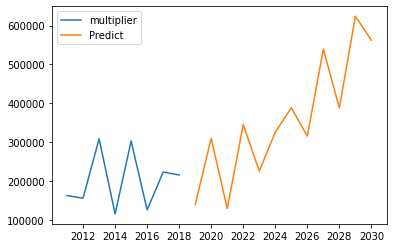

In [ ]:
plt.plot(dfCAGDP['Year'],dfCAGDP['multiplier'], label='multiplier')
plt.plot(y_pred3.index,y_pred3.values, label='Predict')
plt.legend(loc='best')

In [ ]:
y_pred3.values

array([139091.84037935, 309504.39354918, 129010.77756992, 345259.00438887,
       225282.56669708, 325495.34456416, 388449.34438431, 315526.25388863,
       539291.63564393, 388206.07596674, 624242.20417717, 562526.16129676])

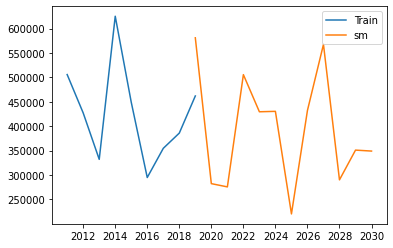

In [ ]:
plt.plot(dfex['Year'],dfex['industry'], label='Train')
plt.plot(y_predindustry.index,y_predindustry.values, label='sm')
plt.legend(loc='best')

In [ ]:
y_predindustry.values

array([581059.90679274, 282480.03784352, 275806.32044329, 505639.878838  ,
       429614.01139624, 430488.50651069, 220480.15438546, 432396.82794456,
       567542.62251183, 290245.84635616, 351125.19527854, 349145.78544844])

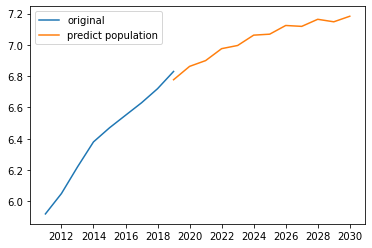

In [ ]:
plt.plot(dfex['Year'],dfex['xk'], label='original')
plt.plot(y_predpo.index,y_predpo.values, label='predict population')
plt.legend(loc='best')

In [ ]:
x3_pred = np.array([2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030])
dfpred3 = pd.DataFrame({'Year': x3_pred, 'multiplier': y_pred3.values, 'xk':y_predpo.values, 'industry':y_predindustry.values})

dfpred3['Year'] = pd.to_datetime(dfpred3['Year'],format='%Y')  
dfpred3.index = dfpred3['Year']
dfpred3

,Year,multiplier,xk,industry
Year,,,,
2019-01-01,2019-01-01,139091.840379,6.777208,581059.906793
2020-01-01,2020-01-01,309504.393549,6.862463,282480.037844
2021-01-01,2021-01-01,129010.777570,6.899405,275806.320443
2022-01-01,2022-01-01,345259.004389,6.975712,505639.878838
2023-01-01,2023-01-01,225282.566697,6.995926,429614.011396
2024-01-01,2024-01-01,325495.344564,7.061951,430488.506511
2025-01-01,2025-01-01,388449.344384,7.068192,220480.154385
2026-01-01,2026-01-01,315526.253889,7.123691,432396.827945
2027-01-01,2027-01-01,539291.635644,7.118007,567542.622512


In [ ]:
dfpred3['expenditure'] = dfpred3.apply(wrapper, axis=1)

dfpred3['exgrowth'] = (dfpred3['expenditure'] - dfpred3['expenditure'].shift(1)).dropna()

dfpred3['exgrowth'][0] = dfpred3['expenditure'][0] - dfex['expenditure']['2018-01-01']
dfpred3['GDPgrowth'] = dfpred3['exgrowth']*dfpred3['multiplier']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dfpred3.insert(dfpred3.shape[1],'GDP',0)
dfpred3['GDP'][0] = dfpred3['GDPgrowth'][0]+dfCAGDP['GDP']['2018-01-01']
for i in range(1,len(dfpred3)):
  dfpred3['GDP'][i] = dfpred3['GDPgrowth'][i]+dfpred3['GDP'][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
dfpred3

,Year,multiplier,xk,industry,expenditure,exgrowth,GDPgrowth,GDP
Year,,,,,,,,
2019-01-01,2019-01-01,139091.840379,6.777208,581059.906793,1.722641e+06,195066.154212,2.713211e+10,359791110385
2020-01-01,2020-01-01,309504.393549,6.862463,282480.037844,1.424070e+06,-298570.558762,-9.240890e+10,267382210663
2021-01-01,2021-01-01,129010.777570,6.899405,275806.320443,1.417400e+06,-6669.683075,-8.604610e+08,266521749663
2022-01-01,2022-01-01,345259.004389,6.975712,505639.878838,1.647242e+06,229841.891490,7.935498e+10,345876732285
2023-01-01,2023-01-01,225282.566697,6.995926,429614.011396,1.571219e+06,-76023.660040,-1.712681e+10,328749927021
2024-01-01,2024-01-01,325495.344564,7.061951,430488.506511,1.572100e+06,881.705377,2.869910e+08,329036918016
2025-01-01,2025-01-01,388449.344384,7.068192,220480.154385,1.362093e+06,-210007.670531,-8.157734e+10,247459576082
2026-01-01,2026-01-01,315526.253889,7.123691,432396.827945,1.574015e+06,211922.734276,6.686719e+10,314326762542
2027-01-01,2027-01-01,539291.635644,7.118007,567542.622512,1.709160e+06,135145.173919,7.288266e+10,387209424434


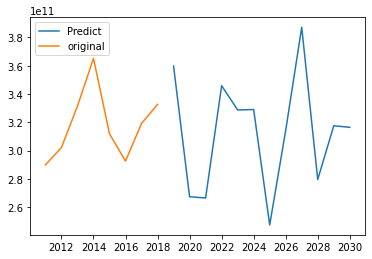

In [ ]:
dfpred3
plt.plot(dfpred3['Year'],dfpred3['GDP'], label='Predict')
plt.plot(dfCAGDP['Year'],dfCAGDP['GDP'], label='original')
plt.legend(loc='best')

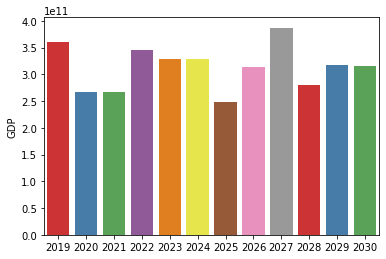

In [ ]:
x3_pred = np.array([2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030])
sns.barplot(x=x3_pred, y='GDP', data=dfpred3, palette='Set1')